In [1]:
using Plots

## Julia绘图-Tutorial
参考：http://docs.juliaplots.org/latest/

### 1. 基本绘图
&ensp;&ensp;&ensp;&ensp;Plots.jl实质上不是一个绘图包，而是许多绘图包的接口，接口所调用的真正执行绘图的库我们称为**backend**，这样子我们就可以通过Julia.jl的绘图接口来使用不同的绘图包。<br />
&ensp;&ensp;&ensp;&ensp;在刚开始用Plots.jl时，会使用默认的后台，默认在浏览器中使用`Plotly`，而在REPL中使用`UnicodePlots`。如果想要绘图风格更适应JUNO的绘图，我们就需要安装其他的绘图后台，比较合适的后台包括PyPlot以及GR，直接用`Pkg.add("GR")`或者`Pkg.add("PyPlot")`就可以进行安装。
1. 对特定的图像进行再次绘图， plt
2. 绘图属性：线宽，线型
3. 绘画框属性：标题
4. 坐标轴属性：在plot中添加，以及后续添加
5. 图片保存，保存为png或者pdf
6. 直接用特殊得线型对应的函数绘图

其他的？
1. x，y等间隔？

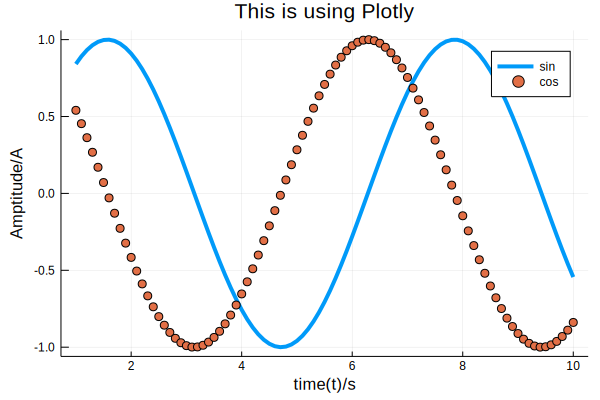

In [2]:
t = 1:0.1:10;
y1, y2 = sin.(t), cos.(t)
# p = plot(t,[y1, y2])
plt = plot(t, y1, lw=4, title="This is using Plotly", label="sin", ylabel="Amptitude/A")
plot!(plt, t, y2, label="cos", seriestype=:scatter)
display(xlabel!(plt, "time(t)/s"))   # 如果不加上dislay，就不会绘制了
savefig(plt, "myplot.png")
savefig("myplot.pdf")                # 好像在这里保存了就不会画图了

#### 多图像绘制
1. 直接多图像，嵌入
2. 中间结果是不绘制的
3. 子图的构造，貌似可以无限嵌套

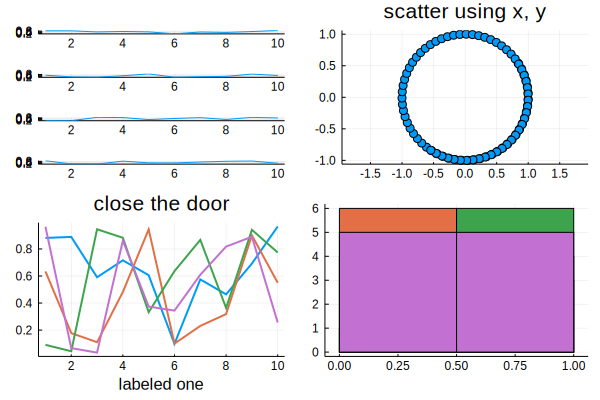

In [4]:
gr()
x = 1:10
y = rand(10, 4)
p1 = plot(x,y,layout=(4,1))
# display(p1)
p2 = scatter(y1, y2, title="scatter using x, y", aspect_ratio=:equal)
p3 = plot(x, y, xlabel="labeled one", lw=2, title="close the door")
p4 = histogram(x, y)
plot(p1, p2, p3, p4, layout=(2,2), legend=false)

### 2. Recipes（暂时不知道怎么翻译）


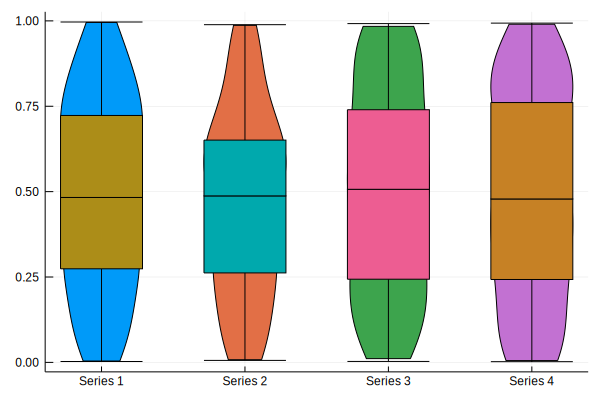

In [36]:
# 所以说谁来解释一下这玩意儿？
using StatsPlots
y = rand(100,4) # Four series of 100 points each
violin(["Series 1" "Series 2" "Series 3" "Series 4"],y,leg=false)
boxplot!(["Series 1" "Series 2" "Series 3" "Series 4"],y,leg=false)

### 3. 进阶


┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1242
Progress: 100%|█████████████████████████████████████████| Time: 0:01:42


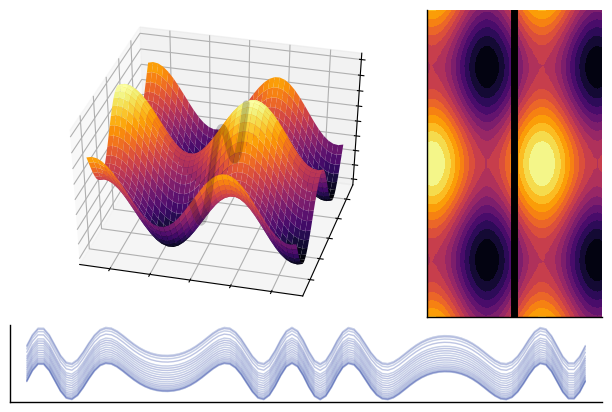

┌ Info: Saved animation to 
│   fn = /home/kuro/julia/Tutorial_julia/paper1/tmp.gif
└ @ Plots /home/kuro/.julia/packages/Plots/h3o4c/src/animation.jl:95


Plots.AnimatedGif("/home/kuro/julia/Tutorial_julia/paper1/tmp.gif")

In [41]:
using Plots, ProgressMeter
pyplot(leg=false, ticks=nothing) #change to the pyplot backend and define some defaults
x = y = range(-5, stop = 5, length = 40)
zs = zeros(0,40)
n = 100

# create a progress bar for tracking the animation generation
prog = Progress(n,1)

@gif for i in range(0, stop = 2π, length = n)
    f(x,y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout=l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera=(15*cos(i), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)

    # increment the progress bar
    next!(prog)
end

In [40]:
import Pkg; Pkg.add("PyPlot")

 Resolving package versions...
 Installed LaTeXStrings ─ v1.0.3
 Installed PyPlot ─────── v2.8.2
 Installed PyCall ─────── v1.91.2
  Updating `~/.julia/environments/v1.2/Project.toml`
  [d330b81b] + PyPlot v2.8.2
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [b964fa9f] + LaTeXStrings v1.0.3
  [438e738f] + PyCall v1.91.2
  [d330b81b] + PyPlot v2.8.2
  Building PyCall → `~/.julia/packages/PyCall/ttONZ/deps/build.log`
